# Quantum Computing

In [ ]:
!pip install qiskit

# Qubit

A qubit short for quantum bit, analogue to a bit in classical computers,<br>
the fundamental medium for how information is transmitted in the quantum world.

When the polarisation is absolute its either 0 or 1.

$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$
$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

# Quantum logic gates

## Hadamard Gate

$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$

# Binomial distribution

In [1]:
import numpy as np

np.random.binomial(100, 0.5)

50

In [2]:
two_coin_flips = np.random.binomial(2, 0.5, 1_000_000)

<AxesSubplot:ylabel='count'>

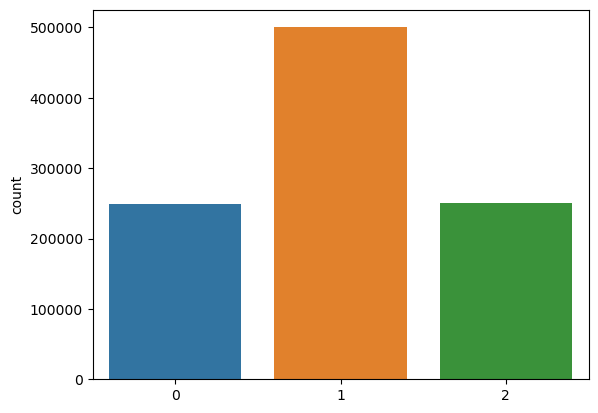

In [3]:
import seaborn as sns
sns.countplot(x=two_coin_flips)

# Quantum Circuit

In [4]:
import qiskit

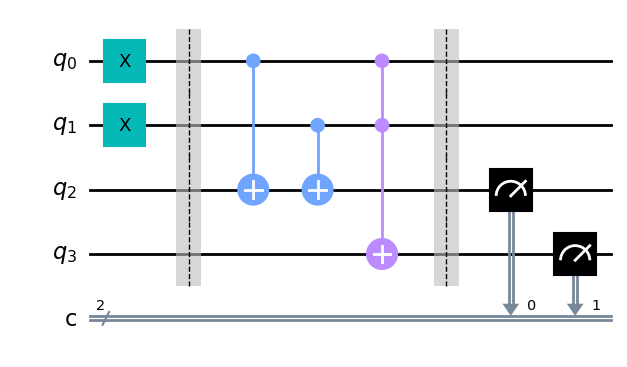

In [5]:
circuit = qiskit.QuantumCircuit(4, 2)

# The inputs will be qubits 0 and 1
circuit.x((0, 1))
circuit.barrier()

# Add Cx logic gate XOR 0 and 1 and put output into 2
circuit.cx(0, 2)
circuit.cx(1, 2)

# Add Ccx logic gate AND 0 and 1 and put output into 3
circuit.ccx(0, 1, 3)
circuit.barrier()

# Measure output
circuit.measure(2, 0) # extract XOR value
circuit.measure(3, 1) # extract AND value

circuit.draw(output="mpl")

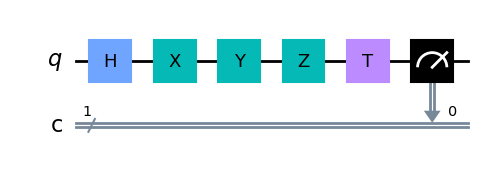

In [6]:
# Quantum circuit 1 quantum and 1 classical bit
circuit = qiskit.QuantumCircuit(1, 1)

# 1 h, z, y, z, t gates
circuit.h(0)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.t(0)

circuit.measure(0, 0)

circuit.draw(output="mpl")

# Deutsch’s Algorithm

### Generating functions dynamically

In [7]:
import random
import itertools

def generate_func(bits_count):
    max_num = (1 << bits_count)
    io_mappings = [*itertools.product([i for i in range(max_num)], repeat=max_num)]
    random_func = random.choice(io_mappings)
    return lambda x: random_func[x]

f = generate_func(1) # {0, 1}

print("f(0) = ", f(0))
print("f(1) = ", f(1))

f(0) =  0
f(1) =  0


### Python inspection magic

In [8]:
import inspect

def is_func_balanced(func):
    # Fetch the variables not local to the generated function
    nonlocals = [*inspect.getclosurevars(func).nonlocals.values()]
    # Filter by the ones that are tuples
    nonlocal_tuples = [*filter(lambda x: type(x) is tuple, nonlocals)][0]
    # If all items are unique, it can be said its balanced
    return len(nonlocal_tuples) == len(set(nonlocal_tuples))

print("Is f balanced: ", is_func_balanced(f))

f1 = generate_func(2) # {0, 1, 2, 3}
print("Is f1 balanced: ", is_func_balanced(f1))

Is f balanced:  False
Is f1 balanced:  True


### Determining if a function is balanced

In [9]:
def is_func_balanced(func, number_of_bits):
    input_set = {i for i in range(number_of_bits)}
    output_set = {func(i) for i in range(number_of_bits)}
    return input_set == output_set

number_of_bits = 2
f2 = generate_func(number_of_bits)
is_func_balanced(f2, number_of_bits)

False

# References

https://quantum-computing.ibm.com/composer/docs/iqx/guide/the-qubit<br>
https://docs.python.org/3/library/inspect.html